<a href="https://colab.research.google.com/github/Eoli-an/Exam-topic-prediction/blob/main/WordFrequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Files

In [2]:
import os
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
import matplotlib.pyplot as plt
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [3]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return(f.read())

In [4]:
lectures = [read_text_file(os.path.join("Transcribes", file)) for file in os.listdir("Transcribes")]

In [5]:
a = [file for file in os.listdir("Transcribes")]
#a.sort()
a

['Lecture_02.txt',
 'Lecture_03.txt',
 'Lecture_04.txt',
 'Lecture_05.txt',
 'Lecture_06.txt',
 'Lecture_07.txt',
 'Lecture_08.txt',
 'Lecture_09.txt',
 'Lecture_10.txt',
 'Lecture_11.txt',
 'Lecture_12.txt']

In [ ]:
['Lecture_02.txt',
 'Lecture_03.txt',
 'Lecture_04.txt',
 'Lecture_05.txt',
 'Lecture_06.txt',
 'Lecture_07.txt',
 'Lecture_08.txt',
 'Lecture_09.txt',
 'Lecture_10.txt',
 'Lecture_11.txt',
 'Lecture_12.txt']

['Lecture_02.txt',
 'Lecture_03.txt',
 'Lecture_04.txt',
 'Lecture_05.txt',
 'Lecture_06.txt',
 'Lecture_07.txt',
 'Lecture_08.txt',
 'Lecture_09.txt',
 'Lecture_10.txt',
 'Lecture_11.txt',
 'Lecture_12.txt']

# Exploration

In [ ]:
# word frequency
tokens = nltk.word_tokenize(lectures[0])
freq = nltk.FreqDist(tokens)
freq = sorted(freq.items(), key=lambda item: item[1])
freq[-100:]


[('right', 19),
 ('going', 20),
 ('function', 20),
 ('all', 20),
 ('now', 20),
 ('very', 21),
 ('mean', 21),
 ('know', 21),
 ('equal', 21),
 ('example', 21),
 ('random', 21),
 ('density', 21),
 ('way', 22),
 ('bias', 22),
 ('variance', 22),
 ('Yes', 23),
 ('case', 23),
 ('y', 24),
 ('population', 24),
 ('get', 24),
 ('they', 24),
 ('number', 25),
 ('Yeah', 25),
 ('see', 26),
 ('your', 26),
 ('experiment', 26),
 ('at', 27),
 ('want', 27),
 ('also', 28),
 ('first', 28),
 ("n't", 28),
 ('sample', 30),
 ('some', 31),
 ('two', 31),
 ('how', 32),
 ('samples', 32),
 ('actually', 32),
 ('probability', 32),
 ('data', 33),
 ('estimator', 33),
 ('think', 35),
 ('maybe', 35),
 ('which', 35),
 ('But', 35),
 ('distribution', 35),
 ('more', 35),
 ('basically', 36),
 ('people', 38),
 ('expectation', 38),
 ('about', 41),
 ('would', 42),
 ('not', 43),
 ('sampling', 43),
 ('an', 44),
 ('with', 44),
 ('or', 45),
 ('but', 45),
 ('by', 45),
 ('as', 47),
 ("'re", 47),
 ('here', 49),
 ('one', 50),
 ('on', 53)

In [ ]:
# word frequency of nouns
# TODO rather restrictive, i.e. regression and logistic regression are two different words
blob = TextBlob(lectures[0])
freq = nltk.FreqDist(blob.noun_phrases)
freq = sorted(freq.items(), key=lambda item: item[1])



In [ ]:
# TODO does not rlly work
is_noun = lambda pos: pos[:2] == 'NN'
tokenized = nltk.word_tokenize(lectures[0])
freq = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
freq = nltk.FreqDist(tokens)
freq = sorted(freq.items(), key=lambda item: item[1])
freq[-20:]

[('be', 106),
 ('for', 110),
 ('can', 112),
 ('I', 117),
 ('And', 136),
 ('in', 140),
 ('it', 141),
 ('and', 150),
 ('So', 199),
 ('that', 204),
 ('we', 209),
 ('a', 213),
 ('to', 248),
 ('is', 260),
 ('this', 269),
 ('of', 287),
 ('you', 309),
 ('.', 585),
 ('the', 593),
 (',', 693)]

# Tokens with overall highest frequency

In [8]:
joined = ""
for l in lectures:
  joined += " " + l
blob = TextBlob(joined)
freq = nltk.FreqDist(blob.noun_phrases)
freq = sorted(freq.items(), key=lambda item: item[1])
freq[-20:]

[("'s kind", 32),
 ('maximum likelihood estimate', 32),
 ('null hypothesis', 33),
 ('python', 34),
 ('machine learning', 35),
 ('log likelihood', 35),
 ('logistic regression', 35),
 ('ai', 40),
 ('fisher', 42),
 ('oh', 47),
 ('germany', 52),
 ('linear regression', 52),
 ('bayesian', 60),
 ("ca n't", 72),
 ('well', 78),
 ('yeah', 79),
 ('pca', 85),
 ('right', 125),
 ('gaussian', 153),
 ('okay', 433)]

In [ ]:
# absolute occurances of sensible noun phrases of top 50
# 9844 noun phrases
# (trivia - he said okay 434 times)
result_all = {"gaussian":153,"pca":85,"bayesian":60,"linear regression":52,"fisher":42,"ai":40,"machine learning":35,"logistic regression":35,"log likelihood":35,"null hypothesis":33,"maximum likelihood estimate":32,
 "iid":31,"standard deviation":28,"linear function":28,"principal component":21,"random number":19,"high dimensional space":19,"dimensional space":19,"laplace":18,"p value":17,
 "control group":17, "monte carlo":16,"information matrix":15,"linear model":15}


# High frequency tokens per lecture

In [49]:
#lecture 02
#total 572
l2 = [('joint probability', 2),
 ('joint distribution', 2),
 ('marginal distribution', 2),
 ('conditional probability', 2),
 ('test quantity', 2),
 ('binary search', 2),
 ('data analysis', 2),
 ('noncentral moment', 2),
 ('square distance', 2),
 ('function outputs', 2),
 ('expectation operator', 2),
 ('individual expectations', 2),
 ('variance drops', 2),
 ('uniform distribution', 2),
 ('gaussian', 2),
 ('observational studies', 3),
 ('observational study', 3),
 ('convergence rate', 4),
 ('data source', 5),
 ('random number', 6),
 ('monte carlo', 9),
 ('iid', 18)]

3.1638333511661747

In [48]:
# lecture 3
# total 838
l3 = [('maximum likelihood', 2),
 ('machine learning class', 2),
 ('x i', 2),
 ('s square', 2),
 ('consistent estimate', 2),
 ('binary logarithm', 3),
 ('conditional distribution', 3),
 ('binary questions', 3),
 ('information gain', 3),
 ('euclidean', 3),
 ('standard deviation', 3),
 ('kl', 3),
 ('random numbers', 4),
 ('iid', 4),
 ('information content', 4),
 ('log likelihood', 4),
 ('sufficient statistics', 4),
 ('qr', 5),
 ('monte carlo', 5),
 ('square root', 5),
 ('shannon', 5),
 ('conditional entropy', 5),
 ('sigma square', 7),
 ('bayesian', 9),
 ('maximum likelihood estimate', 9),
 ('random number', 12),
 ('possible outcomes', 12),
 ('gaussian', 12)]

In [47]:
#lecture 04
# total 988
l4 = [
 ('new data', 3),
 ('iid', 3),
 ('joint distribution', 3),
 ('neural network', 3),
 ('automatic differentiation', 3),
 ('deep neural networks', 3),
 ('gaussians', 3),
 ('bootstrap', 3),
 ('bootstrap estimate', 3),
 ('treatment arm', 3),
 ('bayes', 4),
 ('data points', 4),
 ('original data', 4),
 ('control trial', 5),
 ('probability distribution', 5),
 ('square root', 5),
 ('python', 6),
 ('correct value', 6),
 ('maximum likelihood estimates', 6),
 ('binomial distribution', 7),
 ('true value', 7),
 ('treatment group', 8),
 ('vaccine efficacy', 9),
 ('point estimate', 9),
 ('standard deviation', 9),
 ('score function', 10),
 ('bayesian', 12),
 ('taylor', 12),
 ('control group', 13),
 ('laplace', 13),
 ('information matrix', 15),
 ('log likelihood', 16),
 ('maximum likelihood estimate', 19),
 ('fisher', 28),
 ('gaussian', 36)]

In [46]:
# Lecture 05
# 874
l5 = [('true positive rate', 2),
 ('false positive rate', 2),
 ('qr', 2),
 ('base explanation', 3),
 ('possible explanation', 3),
 ('iid', 3),
 ('control group', 3),
 ('study protocol', 3),
 ('exact test', 3),
 ('probability f.', 3),
 ('unknown variable f', 3),
 ('power times', 3),
 ('classification algorithms', 3),
 ('vaccine efficacy', 4),
 ('treatment group', 4),
 ('machine learning', 4),
 ('control trial', 5),
 ('rejection region', 5),
 ('beta distribution', 5),
 ('mt', 5),
 ('p values', 5),
 ('roc', 5),
 ('fisher', 6),
 ('treatment arm', 6),
 ('control arm', 9),
 ('bayesian', 11),
 ('gaussian', 11),
 ('p value', 11),
 ('mc', 12),
 ('null hypothesis', 23)]

In [45]:
# lecture 06
# total 824
l6 = [('interactive process', 2),
 ('exploratory analysis', 2),
 ('brain activity', 3),
 ('design matrix', 3),
 ('nature', 3),
 ('neural network', 3),
 ('machine learning view', 3),
 ('nonlinear function', 3),
 ('unit variance', 3),
 ('unit variants', 3),
 ('model complexity', 3),
 ('hypothesis test', 3),
 ('difficult task', 3),
 ('regularization term', 3),
 ('training error', 3),
 ('statistical view', 3),
 ('variance sigma', 3),
 ('maximum likelihood estimation', 3),
 ('log likelihood', 3),
 ('maximum likelihood estimate', 3),
 ('hypothesis tests', 3),
 ('regression coefficients', 3),
 ('full posterior distribution', 3),
 ('posterior covariance', 3),
 ('bad assumptions', 3),
 ('clinical trials', 3),
 ('regression problem', 4),
 ('different parameters', 4),
 ('regression models', 5),
 ('linear function', 5),
 ('null hypothesis', 5),
 ('posterior distribution', 5),
 ('linear models', 6),
 ('linear model', 6),
 ('machine learning', 9),
 ('pca', 10),
 ('bayesian', 16),
 ('linear regression', 35),
 ('gaussian', 44)]

In [44]:
#Lecture 07
# 870 noun phrases in total
l7 = [('binary distribution', 3),
 ('regression function', 3),
 ('% probability', 3),
 ('negative log likelihood', 3),
 ('log probability', 3),
 ('odds ratios', 3),
 ('poisson', 3),
 ('decision surface', 4),
 ('binary outcomes', 4),
 ('bernoulli', 4),
 ('average weight', 4),
 ('linear regression model', 4),
 ('causal link', 5),
 ('exponential family', 5),
 ('maximum likelihood estimation', 6),
 ('bayesian', 6),
 ('link function', 6),
 ('linear model', 8),
 ('omega', 9),
 ('regression model', 10),
 ('nonlinear function', 10),
 ('log likelihood', 11),
 ('linear regression', 17),
 ('linear function', 19),
 ('logistic regression', 28),
 ('gaussian', 31),]

In [43]:
#lecture 8
#total 980
l8 = [('who', 3),
 ('generative dimensionality reduction', 3),
 ('orthonormal basis', 3),
 ('inner derivative', 3),
 ('optimal choice', 3),
 ('svd', 3),
 ('low dimensional representation', 3),
 ('geoff hinton', 3),
 ('global structure', 3),
 ('tc', 3),
 ('qr', 4),
 ('quadratic loss', 4),
 ('loss function', 4),
 ('reconstruction error', 4),
 ('singular value decomposition', 4),
 ('standard deviation', 4),
 ('dimensionality reduction', 5),
 ('low dimensional space', 5),
 ('eigen', 5),
 ('euclidean', 5),
 ('gaussian', 7),
 ('fisher', 7),
 ('lda', 8),
 ('principal components', 11),
 ('dimensional space', 16),
 ('high dimensional space', 17),
 ('pca', 44)]

In [42]:
#lecture 09
# total 1003
l9 = [('black box', 2),
 ('rc', 2),
 ('random classifier', 2),
 ('blue group', 2),
 ('blue classifier', 2),
 ('eigen', 3),
 ('original data', 3),
 ('svd', 3),
 ('deep learning', 3),
 ('machine learning engineer', 3),
 ('classification algorithm', 3),
 ('true label', 3),
 ('false positive rate', 3),
 ('fairness criteria', 3),
 ('machine learning', 4),
 ('who', 5),
 ('p value', 5),
 ('delta', 5),
 ('reconstruction error', 5),
 ('average reconstruction error', 5),
 ('standard deviation', 5),
 ('sensitive attributes', 6),
 ('group membership', 6),
 ('ai', 9),
 ('principal components', 10),
 ('pca', 28),
 ('okay', 40)]

In [41]:
#lecture 10
# total 1100
l10 = [
 ('co2 production', 3),
 ('people disagree', 3),
 ('phone chargers', 3),
 ('electricity production', 3),
 ('good news', 3),
 ('different sources', 3),
 ('renewable energy', 3),
 ('energy footprint', 3),
 ('data centers', 3),
 ('uses electricity', 3),
 ('power consumption', 3),
 ('gpu', 3),
 ('phd', 3),
 ('virtual reality', 3),
 ('git', 3),
 ('pdf', 4),
 ('api', 4),
 ('youtube', 4),
 ('electricity consumption', 4),
 ('digital technology', 4),
 ('watt', 4),
 ('gpus', 4),
 ('data analysis', 4),
 ('china', 5),
 ('megawatt hours', 5),
 ('computer science', 6),
 ('machine learning', 6),
 ('corona', 6),
 ('co2 footprint', 6),
 ('digital devices', 6),
 ('watts', 6),
 ('zoom', 6),
 ('energy consumption', 7),
 ('kilowatt hours', 10),
 ('co2 emissions', 12),
 ('ai', 20),
 ('germany', 26)]

In [40]:
# Lecture 11
# 966 total
l11 = [('unit tests', 2),
 ('% confidence', 2),
 ('design process', 3),
 ('open science', 3),
 ('real world', 3),
 ('involves data', 3),
 ('software engineering', 3),
 ('machine learning algorithm', 3),
 ('neural network', 3),
 ('pdfs', 4),
 ('deep neural network', 5),
 ('pdf', 7),
 ('github', 7),
 ('ai', 8),
 ('machine learning', 8),
 ('git', 23)]

In [75]:
# lecture 12
#total 830
l12 = [('age groups', 2),
 ('test error', 2),
 ('x space', 2),
 ('grayscale value', 2),
 ('color scheme', 2),
 ('gamma correction', 2),
 ('visual representations', 3),
 ('fineman', 3),
 ('confidence intervals', 3),
 ('exponential function', 3),
 ('times log', 3),
 ('log log plot', 3),
 ('functional relationship', 3),
 ('standard deviation', 3),
 ('rgb', 3),
 ('gray scale', 3),
 ('square root', 3),
 ('color maps', 3),
 ('log linear plot', 4),
 ('power law', 4),
 ('pdf', 6),
 ('gaussian', 9)]

In [ ]:
blob = TextBlob(lectures[7])
freq = nltk.FreqDist(blob.noun_phrases)
freq = sorted(freq.items(), key=lambda item: item[1])
freq[-50:]


In [26]:
len(blob.noun_phrases)

824

In [12]:
a

['Lecture_09.txt',
 'Lecture_07.txt',
 'Lecture_04.txt',
 'Lecture_02.txt',
 'Lecture_10.txt',
 'Lecture_12.txt',
 'Lecture_08.txt',
 'Lecture_06.txt',
 'Lecture_05.txt',
 'Lecture_11.txt',
 'Lecture_03.txt']

## Plots

<BarContainer object of 22 artists>

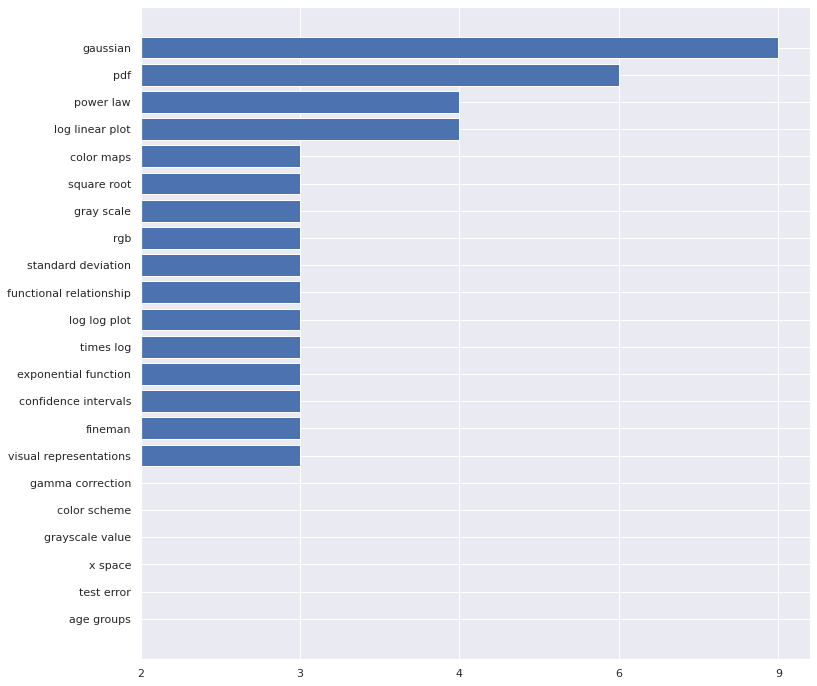

In [102]:
plt.figure(figsize =(12, 12))
l = np.array(l12)
# sns.set_style("darkgrid")
#plt.xlim([0, 9])
plt.barh(l[:,0], l[:,1])

<BarContainer object of 22 artists>

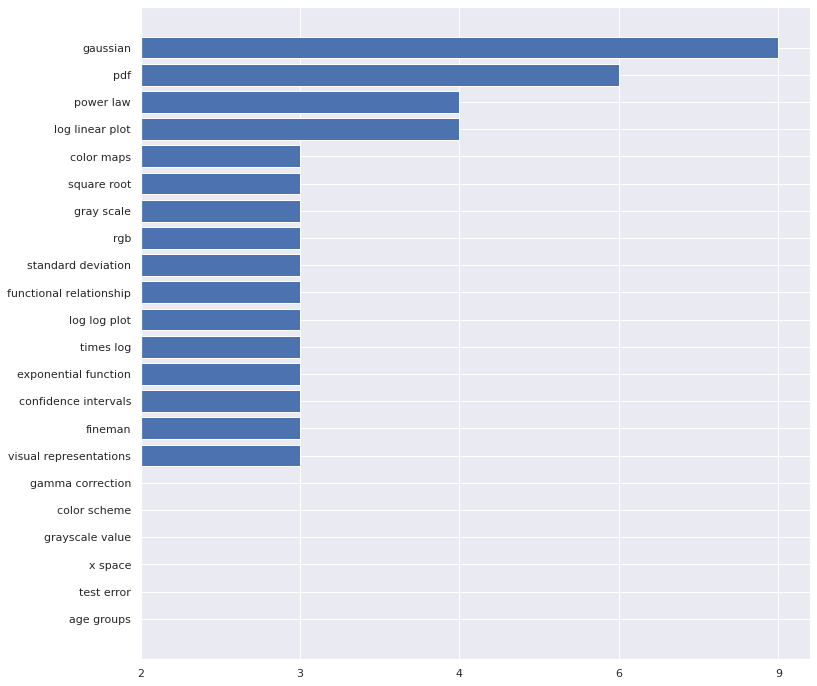

In [100]:
plt.figure(figsize =(12, 12))
l = np.array(l12)
sns.set_style("darkgrid")
#plt.xlim([0, 9])
plt.barh(l[:,0], l[:,1])

In [91]:
import pandas as pd
x = list(l[:,0])
y =  list(l[:,1])
y = [int(k) for k in y]
d = {'x': x, 'y': y}
pdnumsqr = pd.DataFrame(d).explode("y")
pdnumsqr['y'] = pdnumsqr['y'].astype('int')

TypeError: ignored

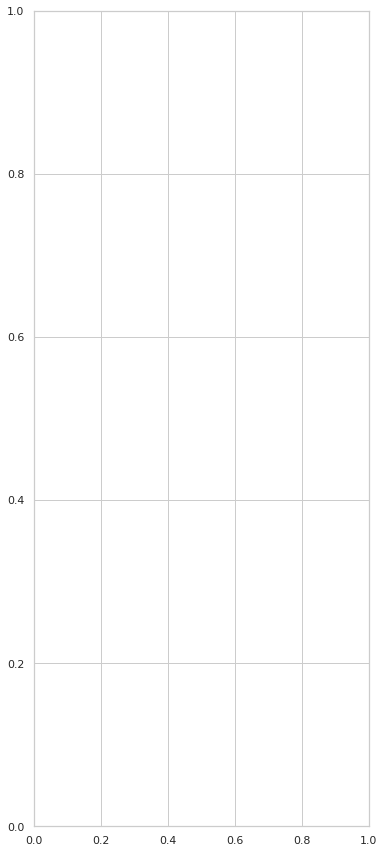

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))



# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="x", y="x", data=pdnumsqr,
            label="Total", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

# Entropy

# text complexity
```



In [50]:
ls = [l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12]

In [52]:
ls = [l9,l7,l4,l2,l10,l12,l8,l6,l5,l11,l3]

In [53]:
import numpy as np

for l in ls:
  total = sum([e[1] for e in l])
  entropy = -1* sum([e[1]/total * np.log(e[1]/total) for e in l])
  print(entropy)

2.808850151030807
2.9422174288132155
3.2750206905352717
2.772981572728279
3.375774373215576
3.0023454902930804
2.890459103838369
3.15652836109251
3.175611494795198
2.4881381472644417
3.1638333511661747


In [ ]:
!pip install textstat
import textstat

In [55]:
for l in lectures:
  print(textstat.flesch_reading_ease(l))

69.11
68.6
69.62
70.63
66.37
79.19
70.53
66.98
68.3
74.73
69.72


In [57]:
for l in lectures:
  print(textstat.automated_readability_index(l))

8.9
9.3
8.9
7.6
10.4
7.6
8.1
10.4
9.3
10.2
8.8


In [58]:

for l in lectures:
  print(textstat.flesch_kincaid_grade(l))

8.3
8.5
8.1
7.8
9.4
6.5
7.8
9.2
8.7
8.3
8.1


In [ ]:
['Lecture_09.txt',
 'Lecture_07.txt',
 'Lecture_04.txt',
 'Lecture_02.txt',
 'Lecture_10.txt',
 'Lecture_12.txt',
 'Lecture_08.txt',
 'Lecture_06.txt',
 'Lecture_05.txt',
 'Lecture_11.txt',
 'Lecture_03.txt']

# New Section

The aim is to get a better impression of overall term frequency of topic related nouns. Therefore we reduce nouns which do not contain any information about lecture topics. We do this by selecting such terms, which are often just phrases or transcription mistakes (like 'll), from the 50 most spoken nouns by hand. 

In [6]:
import numpy as np
import seaborn as sns

In [9]:
overall_highest = sorted(nltk.FreqDist(blob.noun_phrases).items(),key=lambda item: item[1])[-50:]

In [10]:
exclude = ['thanks', 'omicron', 'possible outcomes' 'good thing', 'zoom', 'qr', "'ll talk", 'uk', 'good idea',
           'square root', 'alright', "n't work", 'phd', "'s kind", 'oh', 'germany', "ca n't", 'well', 'yeah',
           'right', 'okay']

In [11]:
important_nouns = []
for noun in overall_highest:
    if noun[0] not in exclude:
        important_nouns.append(noun)
important_nouns = np.array(important_nouns)
important_nouns = important_nouns[::-1]

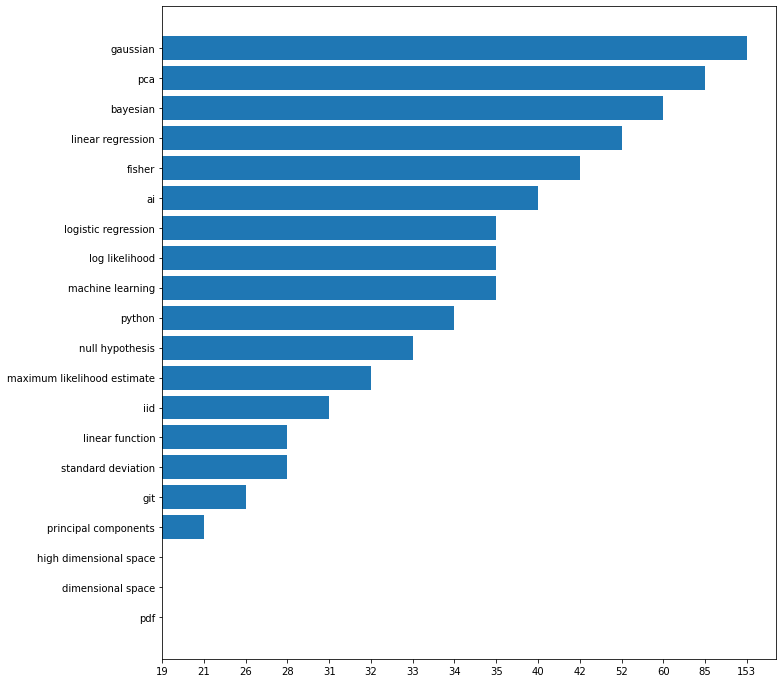

In [67]:
# Chart is super ugly, but this simple kind of visualisation could be nice for a overall overview
# If we decide to put such a plot in the paper we can make this plot pretty nice I think
fig, ax = plt.subplots(figsize =(11, 12))
ax.barh(important_nouns[:,0][-20:], important_nouns[:,1][-20:], align="center")
plt.show()

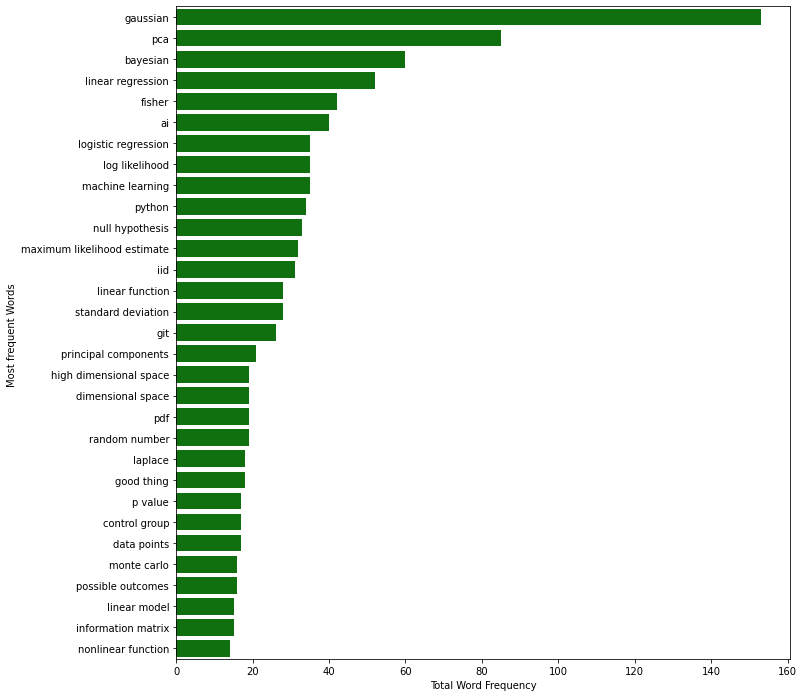

In [116]:
frequency = important_nouns[:,1].astype('int32')
plt.figure(figsize =(11, 12))
sns.barplot(frequency, important_nouns[:,0], color="g")
plt.xlabel("Total Word Frequency")
plt.ylabel("Most frequent Words ")
plt.show()
# Colors
# Text size
# Label for axes
# Titels

Predicting the content of the exam:
* Over all frequency gives us insights which topics seem to be important over all lectures
    * For example Gaussian, Baysian are fundamentals of other topics, therefore they seem to be important for several topics and important to learn for the exam

* Problem: Some terms like linear or logistic regression, maximum likelihood estimator are topics of specific lectures
    * If the term logisitic regression gets mentioned extremly often in the logistic regression lecture, it does not mean that this lecture or topic is more important.
    * Reasons for this assumption:
        * not every lecture is held by mister Hennig. Different persons may have different styles of explaining and illustrating topics.
        * To explain a specific topic one word could occur very often. If this topic is not relevant itself, the high frequency of the word has no power in answering our question.
        

To get another prediction of exam topics, we need to find a structure of a probability across lectures. This could emphasize basic knowledge behind the topics.

Example if f.e. iid. would occur as a result, we would assume understanding iid and it's consequences to the data is crucial to understand the topics which are based on iid assumptions. 


In [118]:
lectures_dict = {}
for file in os.listdir("Transcribes"):
    lectures_dict[re.sub("\D", "", file)] = read_text_file(os.path.join("Transcribes", file))

In [119]:
def token_frequency(blob):
    freq = nltk.FreqDist(blob.noun_phrases)
    freq = sorted(freq.items(), key=lambda item: item[1])
    return freq

In [ ]:
# logistic regression lecture
lec_7 = token_frequency(TextBlob(lectures_dict["07"]))
lec_7[-20:]

[('exponential family', 5),
 ('yeah', 6),
 ('omega zero', 6),
 ("ca n't", 6),
 ('maximum likelihood estimation', 6),
 ('bayesian', 6),
 ('positive number', 6),
 ('link function', 6),
 ('alright', 8),
 ('linear model', 8),
 ('well', 9),
 ('omega', 9),
 ('regression model', 10),
 ('nonlinear function', 10),
 ('log likelihood', 11),
 ('linear regression', 17),
 ('linear function', 19),
 ('logistic regression', 28),
 ('gaussian', 31),
 ('okay', 89)]

In [ ]:
# linear regression lecture
lec_6 = token_frequency(TextBlob(lectures_dict["06"]))
lec_6[-20:]

[('regression problem', 4),
 ('different parameters', 4),
 ('input x', 5),
 ('parameters omega', 5),
 ('regression models', 5),
 ('linear function', 5),
 ('peter', 5),
 ('null hypothesis', 5),
 ('posterior distribution', 5),
 ('linear models', 6),
 ('linear model', 6),
 ('right', 7),
 ('well', 8),
 ('machine learning', 9),
 ('alright', 10),
 ('pca', 10),
 ('bayesian', 16),
 ('linear regression', 35),
 ('gaussian', 44),
 ('okay', 63)]

In [106]:
# logistic regression is said 28 of 35 times in the logistic regression lecture

In [120]:
# worse results after correcting spelling mistakes
lec_06_cor = token_frequency(TextBlob(lectures_dict["06"]).correct())
lec_06_cor[-20:]

[('input x', 5),
 ('repression models', 5),
 ('linear function', 5),
 ('peter', 5),
 ('russian model', 5),
 ('null hypothesis', 5),
 ('russian', 5),
 ('posterior distribution', 5),
 ('russian models', 6),
 ('parameter opera', 6),
 ('linear models', 6),
 ('linear model', 6),
 ('right', 7),
 ('well', 8),
 ('machine learning', 9),
 ('alright', 10),
 ('pca', 10),
 ('bayesian', 16),
 ('linear repression', 35),
 ('okay', 63)]